In [3]:
import pandas as pd
import joblib

bsDF = pd.read_csv('decade.csv',header=None)
bsDF.columns = ['팀명','2점슛','3점슛','자유투','덩크','어시스트','공리','수리','스틸','블록슛','파울']

In [4]:
# 전처리 함수 :
def change(dataframe_):
    name = ['2점','3점','자유투']
    for i in range(1,4):
        if (dataframe_[dataframe_.columns[i]] == '0').sum() != 0:
            index = dataframe_[dataframe_[dataframe_.columns[i]] == '0'].index

            for idx in index.tolist():
                dataframe_.iloc[idx,i] = '0/1'

            score = dataframe_[dataframe_.columns[i]].str.split('/')
            dataframe_[i] = score.str[0].astype(int)
            dataframe_[i+0.2] = score.str[1].astype(int)
            dataframe_[i+0.22] = round(score.str[0].astype(int)/score.str[1].astype(int),3)
        else:
            score = dataframe_[dataframe_.columns[i]].str.split('/')
        dataframe_[f'{name[i-1]}_성공수'] = score.str[0].astype('int64')
        dataframe_[f'{name[i-1]}_시도수'] = score.str[1].astype('int64')
        dataframe_[f'{name[i-1]}_성공률'] = round(score.str[0].astype(int)/score.str[1].astype(int),3)
    # dataframe_['필드골_성공률'] = round((dataframe_['2점_성공수']+dataframe_['3점_성공수'])/(dataframe_['2점_시도수']+dataframe_['3점_시도수']),3)
    
    return  dataframe_

In [5]:
# 컬럼 추가 및 전처리
bsDF = change(bsDF)
bsDF = bsDF.drop(columns=['2점슛','3점슛','자유투','덩크'])
bsDF = bsDF[['팀명','2점_성공수','2점_시도수','2점_성공률','3점_성공수','3점_시도수','3점_성공률','자유투_성공수','자유투_시도수','자유투_성공률','어시스트','공리','수리','스틸','블록슛','파울']]

result = []
score = []
for idx in range(0,bsDF.shape[0],2):
    homeScore = bsDF.iloc[idx,1] * 2 + bsDF.iloc[idx,4] * 3 + bsDF.iloc[idx,7]
    awayScore = bsDF.iloc[idx+1,1] * 2 + bsDF.iloc[idx+1,4] * 3 + bsDF.iloc[idx+1,7]
    score.extend([homeScore,awayScore])
    if homeScore > awayScore:
        result.extend([1,0])
    else:
        result.extend([0,1])
# bsDF['득점'] = score
# 1:승, 0:패
bsDF['경기결과'] = result
bsDF.drop(columns='팀명',inplace=True)

# 데이터 확인 및 결측치, 이상치, 중복치 제거

In [7]:
from utill import PreprecessingData, ExtractionFeature,set_os_specific_font
set_os_specific_font()

bsClass = PreprecessingData(bsDF)
bsClass.getBasicInformation()

운영체제: Darwin, 폰트 설정 완료: AppleGothic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7710 entries, 0 to 7709
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2점_성공수   7710 non-null   int64  
 1   2점_시도수   7710 non-null   int64  
 2   2점_성공률   7710 non-null   float64
 3   3점_성공수   7710 non-null   int64  
 4   3점_시도수   7710 non-null   int64  
 5   3점_성공률   7710 non-null   float64
 6   자유투_성공수  7710 non-null   int64  
 7   자유투_시도수  7710 non-null   int64  
 8   자유투_성공률  7710 non-null   float64
 9   어시스트     7710 non-null   int64  
 10  공리       7710 non-null   int64  
 11  수리       7710 non-null   int64  
 12  스틸       7710 non-null   int64  
 13  블록슛      7710 non-null   int64  
 14  파울       7710 non-null   int64  
 15  경기결과     7710 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 963.9 KB
None
            2점_성공수       2점_시도수       2점_성공률       3점_성공수       3점_시도수  \
count  7710.000000  7710.000000  7710.000

In [8]:
bsClass.getMissingValue()

2점_성공수     0
2점_시도수     0
2점_성공률     0
3점_성공수     0
3점_시도수     0
3점_성공률     0
자유투_성공수    0
자유투_시도수    0
자유투_성공률    0
어시스트       0
공리         0
수리         0
스틸         0
블록슛        0
파울         0
경기결과       0
dtype: int64


IndexError: index 16 is out of bounds for axis 0 with size 16

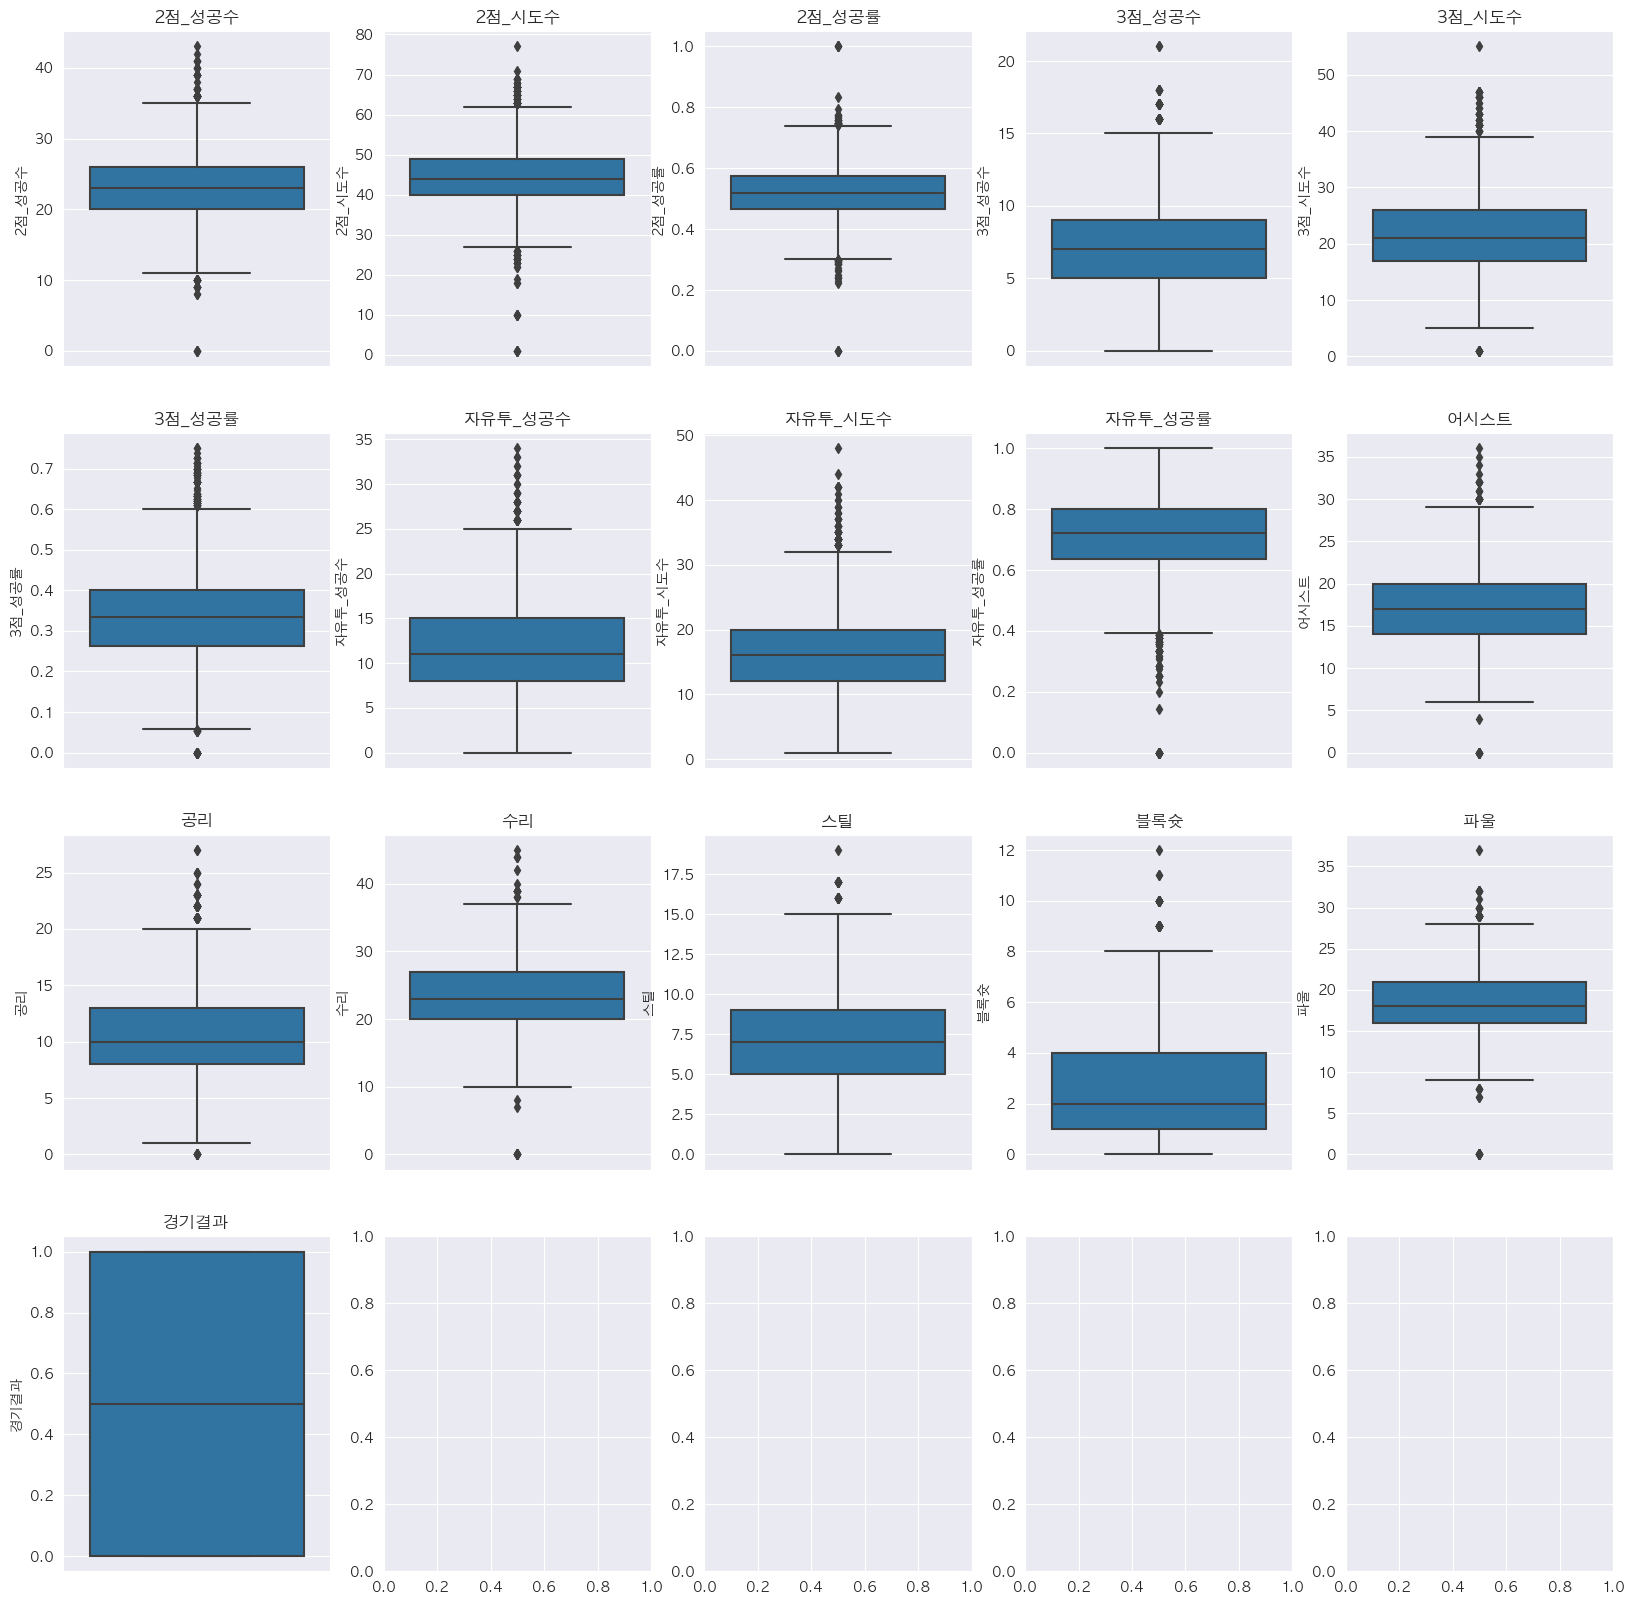

In [9]:
bsClass.getBoxByCol()
bsClass

In [ ]:
bsClass.deleteMissingValue()
bsClass.deleteDuplicated()

In [10]:
bsClass.getBasicInformation()
bsDF = bsClass.getDataFrame()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7710 entries, 0 to 7709
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2점_성공수   7710 non-null   int64  
 1   2점_시도수   7710 non-null   int64  
 2   2점_성공률   7710 non-null   float64
 3   3점_성공수   7710 non-null   int64  
 4   3점_시도수   7710 non-null   int64  
 5   3점_성공률   7710 non-null   float64
 6   자유투_성공수  7710 non-null   int64  
 7   자유투_시도수  7710 non-null   int64  
 8   자유투_성공률  7710 non-null   float64
 9   어시스트     7710 non-null   int64  
 10  공리       7710 non-null   int64  
 11  수리       7710 non-null   int64  
 12  스틸       7710 non-null   int64  
 13  블록슛      7710 non-null   int64  
 14  파울       7710 non-null   int64  
 15  경기결과     7710 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 963.9 KB
None
            2점_성공수       2점_시도수       2점_성공률       3점_성공수       3점_시도수  \
count  7710.000000  7710.000000  7710.000000  7710.000000  7710.000000   
mea

In [11]:
bsDF.corr()['경기결과'].sort_values(ascending=False)

경기결과       1.000000
수리         0.355885
어시스트       0.321375
2점_성공률     0.321207
2점_성공수     0.313834
3점_성공률     0.289079
블록슛        0.168522
자유투_성공수    0.150508
3점_성공수     0.148141
스틸         0.141299
자유투_시도수    0.118505
2점_시도수     0.099705
자유투_성공률    0.095033
공리         0.014006
3점_시도수    -0.102618
파울        -0.107444
Name: 경기결과, dtype: float64

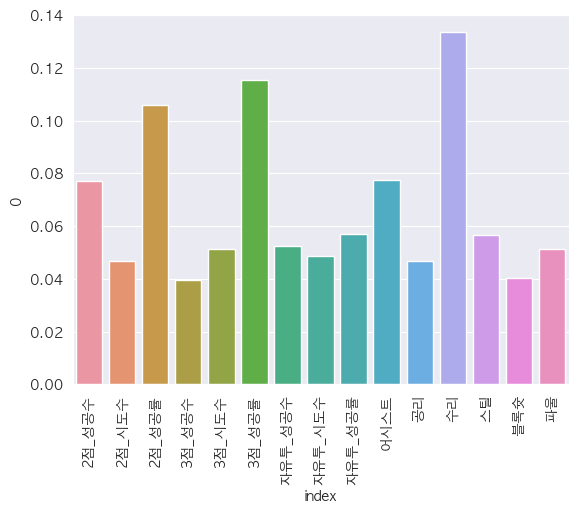

In [12]:
targetDF = bsDF['경기결과']
featureDF = bsDF.drop(columns='경기결과')

extractClass = ExtractionFeature(featureDF,targetDF)
importanceDF = extractClass.showClassifierImportanceFeature()


In [22]:
importanceDF.sort_values(by=0,ascending=False)

,index,0
11,수리,0.133295
5,3점_성공률,0.114800
2,2점_성공률,0.109313
9,어시스트,0.075100
0,2점_성공수,0.073168
8,자유투_성공률,0.059015
12,스틸,0.058059
6,자유투_성공수,0.052787
4,3점_시도수,0.050665
14,파울,0.049389


In [13]:
# 상위 10개로 먼저!
colImportance = importanceDF.sort_values(by=0,ascending=False).iloc[:10,0].tolist()
featureDF = extractClass.getImporttanceFeature(colImportance)
featureDF


,수리,3점_성공률,2점_성공률,어시스트,2점_성공수,자유투_성공률,스틸,자유투_성공수,파울,3점_시도수
0,23,0.381,0.391,13,18,0.778,5,14,22,21
1,22,0.500,0.578,21,26,0.667,2,10,19,14
2,20,0.538,0.442,13,19,0.800,7,12,17,13
3,21,0.385,0.375,17,18,0.800,3,4,19,26
4,25,0.250,0.565,15,26,0.818,10,18,26,16
...,...,...,...,...,...,...,...,...,...,...
7705,30,0.227,0.684,19,26,0.895,4,17,21,22
7706,23,0.346,0.447,15,17,0.786,8,11,20,26
7707,30,0.357,0.444,18,24,0.875,6,14,18,14
7708,20,0.350,0.432,15,16,0.619,9,13,16,40


In [14]:
# random_state = 10, test_size = 0.2
from utill import readyDataSet
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(featureDF,targetDF,stratify=targetDF,test_size=0.1,random_state=10)
# scale => StandarScaler()
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train_x)

train_x_scale = scale.transform(train_x)
test_x_scale = scale.transform(test_x)


# 모델 단순 성능비교

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelList = [KNeighborsClassifier(),LogisticRegression(),SGDClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in modelList:
    model.fit(train_x_scale,train_y)
    
    print(model)
    print(f"train score : {model.score(train_x_scale,train_y)}, test score : {model.score(test_x_scale,test_y)}")


KNeighborsClassifier()
train score : 0.8455108805303357, test score : 0.77431906614786
LogisticRegression()
train score : 0.7924773022049286, test score : 0.7898832684824902
SGDClassifier()
train score : 0.7712926934716818, test score : 0.7626459143968871
SVC()
train score : 0.8296584522265457, test score : 0.8054474708171206
DecisionTreeClassifier()
train score : 1.0, test score : 0.7859922178988327
RandomForestClassifier()
train score : 1.0, test score : 0.8521400778210116


[0.789074074074074, 0.7766666666666666, 0.012407407407407423, 16]
[0.7881481481481482, 0.78, 0.008148148148148127, 40]
[0.7894444444444444, 0.7883333333333333, 0.0011111111111110628, 57]
[0.7868518518518518, 0.795, -0.008148148148148238, 72]
[0.7842592592592592, 0.7933333333333333, -0.009074074074074123, 99]


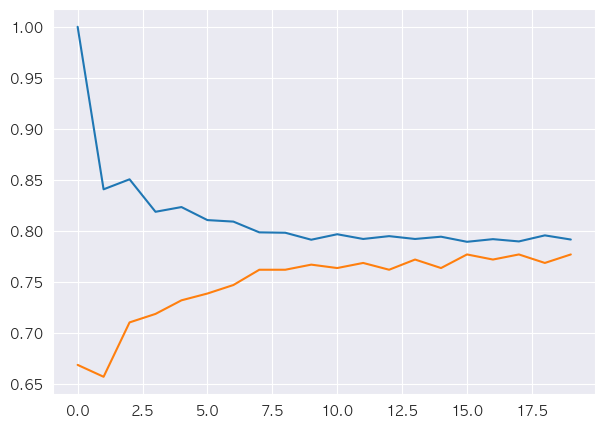

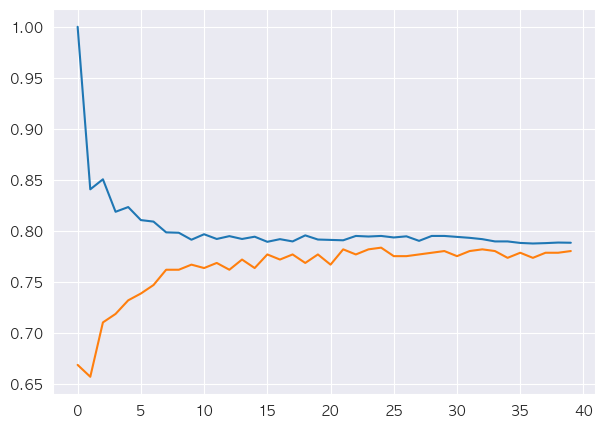

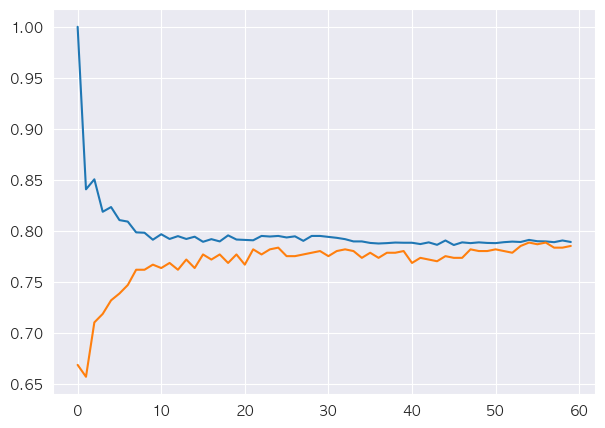

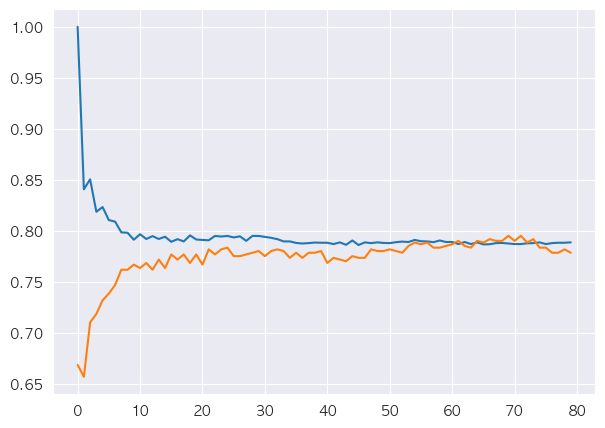

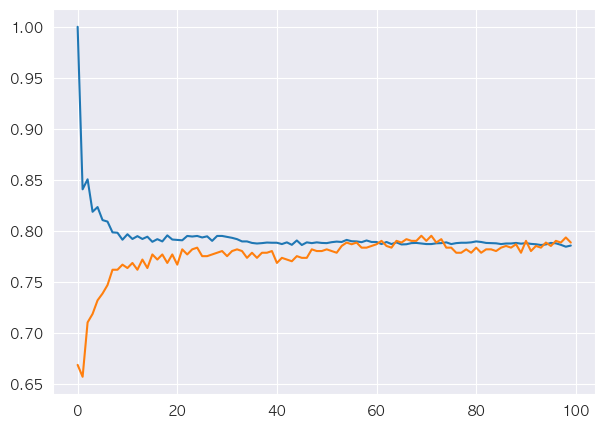

In [440]:
# KneighborsClassifier로 최고의 모델 만들기 k = 72 일때 가장 좋다
import matplotlib.pyplot as plt
import seaborn as sns

for maxK in range(20,101,20):
    train_score = []
    test_score = []
    for k in range(1,maxK+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_x_scale,train_y)
        train_score.append(knn.score(train_x_scale,train_y))
        test_score.append(knn.score(test_x_scale,test_y))

    plt.figure(figsize=(7,5))
    sns.lineplot(x=range(0,maxK),y=train_score)
    sns.lineplot(x=range(0,maxK),y=test_score)

    best = 1000
    result = [0,1]
    n_neighbors = 1
    for i, j in zip(train_score,test_score):
        if best > i-j:
            best = i-j
            result = [i,j,i-j,n_neighbors]
        n_neighbors += 1

    print(result)

joblib.dump(best,'./bs_Knn_model.pkl')

In [441]:
best = KNeighborsClassifier(n_neighbors=72).fit(train_x_scale,train_y)
joblib.dump(best,'./bs_Knn_model.pkl')

['./bs_Knn_model.pkl']

In [442]:
# SGDClassifier() 최고의 만들기 튜닝
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {'loss' : ['log_loss','modified_huber','perceptron'],
         'penalty':['l1','l2','elasticnet',None],
         'alpha':np.random.uniform(0,1,20),
         'learning_rate':['optimal','constant','invscaling','adaptive']}

sgd = GridSearchCV(SGDClassifier(), param_grid=param,cv=5)
sgd.fit(train_x_scale,train_y)
print(sgd.best_params_)
best = sgd.best_estimator_
print(sgd.best_score_,best.score(test_x_scale,test_y))
joblib.dump(best,'./bs_SGD_model.pkl')

{'alpha': 0.04839470175979943, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l1'}
0.79 0.8


/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3600 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/skle

['./bs_SGD_model.pkl']

In [443]:
# SVC() 최고의 만들기 튜닝
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {'C':[0.00005,0.0000001,0.001,0.01,0.1,1],
         'kernel':['linear','poly','rbf'],
         'degree':[1,2,3,4,5],
         'gamma':['scale','auto'],
         'max_iter':[10,50,100,200,300]}

# svc = GridSearchCV(SVC(),param_grid={'C':[0.15],'kernel':['rbf'],'degree':[3],'gamma':['auto']},cv=5)
svc = GridSearchCV(SVC(),param_grid=param,cv=5)
svc.fit(train_x_scale,train_y)
best = svc.best_estimator_
print(svc.score(train_x_scale,train_y),svc.score(test_x_scale,test_y))
joblib.dump(best,'./bs_SVC_model.pkl')

/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/geunsinsa/anacond

0.7292592592592593 0.7366666666666667


/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


['./bs_SVC_model.pkl']

In [444]:
# DecisionTreeClassifier() 최고의 만들기 튜닝
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {'criterion':['gini','entropy','log_loss'],
         'splitter':['best','random'],
         'max_depth':[3,5,7,9,11,13,15],
         'min_samples_split':[2,3,4,5,6],
         'min_impurity_decrease':[0,0.00005,0.0000001,0.001,0.01,0.1,1]}

dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param,cv=5)
dt.fit(train_x_scale,train_y)
print(dt.best_params_)
best = dt.best_estimator_
print(dt.best_score_,best.score(test_x_scale,test_y))
joblib.dump(best,'./bs_DecisionTree_model.pkl')

{'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 5, 'splitter': 'best'}
0.722037037037037 0.7316666666666667


['./bs_DecisionTree_model.pkl']

In [445]:
# RandomforestClassifier() 최고의 만들기 튜닝
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {'criterion':['gini','entropy','log_loss'],
         'max_depth':[3,5,7,9,11,13,15],
         'min_samples_split':[2,3,4,5,6],
         'min_impurity_decrease':[0,0.00005,0.0000001,0.001,0.01,0.1,1]}

rd = GridSearchCV(RandomForestClassifier(), param_grid=param,cv=5)
rd.fit(train_x_scale,train_y)
print(rd.best_params_)
best = rd.best_estimator_
print(rd.best_score_,best.score(test_x_scale,test_y))
joblib.dump(best,'./bs_RandomForest_model_model.pkl')

KeyboardInterrupt: 

In [22]:
# 2023년 경기 기록(result.csv) or 2023플레이오프 기록(testCase.csv)
testCase = pd.read_csv('result.csv',header=None)
testCase.columns = ['팀명','2점슛','3점슛','자유투','덩크','어시스트','공리','수리','스틸','블록슛','파울']
testCase = change(testCase)
testCase = testCase.drop(columns=['2점슛','3점슛','자유투','덩크'])
testCase = testCase[['팀명','2점_성공수','2점_시도수','2점_성공률','3점_성공수','3점_시도수','3점_성공률','자유투_성공수','자유투_시도수','자유투_성공률','어시스트','공리','수리','스틸','블록슛','파울']]

result = []
score = []
for idx in range(0,testCase.shape[0],2):
    homeScore = testCase.iloc[idx,1] * 2 + testCase.iloc[idx,4] * 3 + testCase.iloc[idx,7]
    awayScore = testCase.iloc[idx+1,1] * 2 + testCase.iloc[idx+1,4] * 3 + testCase.iloc[idx+1,7]
    score.extend([homeScore,awayScore])
    if homeScore > awayScore:
        result.extend([1,0])
    else:
        result.extend([0,1])
# testCase['득점'] = score
# 1:승, 0:패
testCase['경기결과'] = result

testCase.drop(columns='팀명',inplace=True)
targetDF = testCase['경기결과']
featureDF = testCase.drop(columns='경기결과')
featureDF = testCase[importanceDF.sort_values(by=0,ascending=False).iloc[:10,0].tolist()]
scale_test = scale.transform(featureDF)

# 결과값 보정 : 경기를 함에 있어 둘다 승승, 패패가 나올 수 없기에
# 승리 확률(1)이 큰 값을 1로 해주고 작은 값을 0으로 변환

In [17]:

def resultTransform(model,test_x):
    pred = model.predict(test_x)
    proba = model.predict_proba(test_x)

    real_result = []

    for i in range(0,proba.shape[0],2):
        if pred[i] == pred[i+1]:
            if proba[i,1] >= proba[i+1,1]:
                real_result.extend([1,0])
            else:
                real_result.extend([0,1])
        else:
            real_result.extend([pred[i],pred[i+1]])

    return np.array(real_result)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
dt = joblib.load('./bs_DecisionTree_model.pkl')
# rd = joblib.load('./bs_RandomForest_model_model.pkl')
rd = RandomForestClassifier(max_depth=7, min_impurity_decrease=0,
                       min_samples_split=5).fit(train_x_scale,train_y)
knn = joblib.load('./bs_Knn_model.pkl')
logistic = LogisticRegression().fit(train_x_scale,train_y)
sgd = SGDClassifier(loss='log_loss',alpha=0.04839470175979943, learning_rate='optimal',penalty='l1').fit(train_x_scale,train_y)
svc = SVC(probability=True,C=0.1, degree=1,gamma='auto', kernel='rbf', max_iter=300).fit(train_x_scale,train_y)

# sgd = joblib.load('./bs_SGD_model.pkl')

/Users/geunsinsa/anaconda3/envs/my_python/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [19]:
import numpy as np
for model in [knn, logistic,sgd,svc,dt,rd]:
    transformRusult = resultTransform(model, scale_test)
    answer = (transformRusult==targetDF).sum()
    print(model)
    print()
    print('결과 보정 전 : ',(model.predict(scale_test)==targetDF).sum() ,'/',scale_test.shape[0])
    print('결과 보정 후 : ',answer,'/',scale_test.shape[0])
    print()

KNeighborsClassifier(n_neighbors=72)

결과 보정 전 :  418 / 568
결과 보정 후 :  466 / 568

LogisticRegression()

결과 보정 전 :  450 / 568
결과 보정 후 :  482 / 568

SGDClassifier(alpha=0.04839470175979943, loss='log_loss', penalty='l1')

결과 보정 전 :  439 / 568
결과 보정 후 :  476 / 568

SVC(C=0.1, degree=1, gamma='auto', max_iter=300, probability=True)

결과 보정 전 :  371 / 568
결과 보정 후 :  404 / 568

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0,
                       min_samples_split=5)

결과 보정 전 :  414 / 568
결과 보정 후 :  452 / 568

RandomForestClassifier(max_depth=7, min_impurity_decrease=0,
                       min_samples_split=5)

결과 보정 전 :  467 / 568
결과 보정 후 :  512 / 568
